In [11]:
# imports
import json
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import sklearn
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
city = 'Bhopal'

In [3]:
# data read
df1 = pd.read_excel(f'./data-sept-14/{city}/Item-wise-details-{city}-17-23-Dec-2021.xlsx')
df1 = df1.sort_values(by =['Order_Date', 'Location_Code', 'Order_Number'])
df2 = pd.read_excel(f'./data-sept-14/{city}/Item-wise-details-{city}-24-31-Dec-2021.xlsx')
df2 = df2.sort_values(by =['Order_Date', 'Location_Code', 'Order_Number'])

In [4]:
df = pd.concat([df1, df2])
df = df[pd.notna(df['Oven_Time'])]

In [5]:
RestaurantWiseOrders = {}
for index, order in df.iterrows():
    rest = order['Location_Code']
    if rest in RestaurantWiseOrders:
        RestaurantWiseOrders[rest].append(order)
    else:
        RestaurantWiseOrders[rest] = [order]

orderDict1 = df1.to_dict('records')
orderDict2 = df2.to_dict('records')
orders = []
for dic in orderDict1:
	orders.append(dic)
for dic in orderDict2:
    orders.append(dic)

In [6]:
sampleRest = 'DPI63827'
sampleOrder = RestaurantWiseOrders[sampleRest][0]

In [27]:
sampleOrder

Location_Code                                              DPI63827
storedesc                 C. I. SQUARE BUILDING, KOLAR ROAD, BHOPAL
city                                                         BHOPAL
Order_Date                                      2021-12-17 00:00:00
Order_Number                                                      1
Customer_Code                                                 27166
Customer_Name                         SakshamGawande SakshamGawande
Actual_Order_Date                        2021-12-17 11:05:32.803000
Order_Status_Code                                                 4
Order_Type_Code                                                   D
Order_Saved                              2021-12-17 11:05:32.803000
Order_Time                                                        0
Driver_ID                                                  929444.0
Driver_Shift                                                      1
Route_Time                                      

In [12]:
def getMinuteSlot(dt):
    current = datetime(2011, 1, 1)
    t1 = current.time()
    t2 = dt.time()
    for i in range(0, 24*60):
        current = current + timedelta(minutes = 1)
        if(current.time() > t2):
            return i
    return 24*60-1

In [14]:
restaurantWiseCumulativeOrders = {}
for rest in RestaurantWiseOrders.keys():
    restaurantWiseCumulativeOrders[rest] = {}

# order count per slot
for rest in RestaurantWiseOrders.keys():
    for order in RestaurantWiseOrders[rest]:
        date = order['Order_Date']
        minuteSlot = getMinuteSlot(order['Kitchen_Display_Time'])
        if date in restaurantWiseCumulativeOrders[rest]:
            restaurantWiseCumulativeOrders[rest][date][minuteSlot]+=1
        else:
            t = []
            for i in range(0, 24*60):
                t.append(0)
            restaurantWiseCumulativeOrders[rest][date] = t
            restaurantWiseCumulativeOrders[rest][date][minuteSlot] = 1
            
#prefix sum            
for rest in restaurantWiseCumulativeOrders.keys():
    for date in restaurantWiseCumulativeOrders[rest].keys():
        for i in range(1, 24*60):
            restaurantWiseCumulativeOrders[rest][date][i] += restaurantWiseCumulativeOrders[rest][date][i-1]

In [15]:
d = datetime.strptime('2021-12-17 00:00:00', '%Y-%m-%d %H:%M:%S')
restaurantWiseCumulativeOrders[sampleRest][d]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [72]:
def countPastOrders(order, restaurantWiseCumulativeOrders, slotTime):
    minuteSlot = getMinuteSlot(order['Kitchen_Display_Time'])
    total = restaurantWiseCumulativeOrders[order['Location_Code']][order['Order_Date']][minuteSlot]
    prev = restaurantWiseCumulativeOrders[order['Location_Code']][order['Order_Date']][max(minuteSlot-slotTime, 0)]
    return total-prev

In [73]:
countPastOrders(sampleOrder, restaurantWiseCumulativeOrders, 10)

4

In [17]:
item_types = df['Menu_Code'].unique()
rest_types = df['Location_Code'].unique()

In [18]:
def getOneHotEncodingItem(item, item_types, shouldClubItemsOfSameType=True):
    a = []
    if shouldClubItemsOfSameType:
        a = [i[0:3] for i in item_types]
    else:
        a = item_types
    it = []
    for i in a:
        if i not in it:
            it.append(i)
    ret=[]
    for i in range(0, len(it)):
        if (it[i] == item[0:min(len(item), len(it[i]))]):
            ret.append(1)
        else:
            ret.append(0)
    return ret

In [19]:
def getOneHotEncodingRestaurant(dp, restaurants):
    l = []
    for i in range(0, len(restaurants)):
        if(restaurants[i] == dp):
            l.append(1)
        else:
            l.append(0)
    return l

In [29]:
total_slots = 24
def getTimeIndex(dt):
	current = datetime(2011, 1, 1)
	t1 = current.time()
	t2 = dt.time()
	for i in range(0, total_slots):
		current = current + timedelta(minutes = 60)
		if(current.time() > t2):
			return i
	return total_slots-1

In [21]:
def getOneHotEncodingTimeSlot(ts):
    l = []
    for i in range(0, 24):
        l.append(0)
    l[ts] = 1
    return l

In [28]:
def get_preparation_time(order):
	diff = order['Oven_Time'] - order['Kitchen_Display_Time']
	return diff.total_seconds()

In [101]:
isThreshold = False
threshold = 30 # minutes for preparation time (threshold)
splitMethod = 'random'
slotTime = 10 # minutes
X_train, X_test, y_train, y_test = [], [], [], []
X = []
y = []
for index, order in df.iterrows():
    features = []
    features = getOneHotEncodingItem(order['Menu_Code'], item_types, False)
    features = features + getOneHotEncodingRestaurant(order['Location_Code'], rest_types)
    features = features + getOneHotEncodingTimeSlot(getTimeIndex(order['Kitchen_Display_Time']))
    features = features + [countPastOrders(order, restaurantWiseCumulativeOrders, slotTime)]
    if(isThreshold and (get_preparation_time(order) > (threshold-9)*60)): #removing inputs 
        continue
    X.append(features)
    y.append(420+round(get_preparation_time(order)))
#     if((order['ORDER_DATE'] >='2021-12-20' and order['ORDER_DATE'] <= '2021-12-24') or (order['ORDER_DATE'] >='2021-12-27' and order['ORDER_DATE'] <= '2021-12-29')):
#         X_train.append(features)
#         y_train.append(420+round(get_preparation_time(order)))
#     elif(order['ORDER_DATE'] =='2021-12-30'):
#         X_test.append(features)
#         y_test.append(420+round(get_preparation_time(order)))

In [102]:
if splitMethod == 'random':
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [103]:
# random forest
from sklearn.ensemble import RandomForestRegressor 

print("Random Forest Model")
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

Random Forest Model


RandomForestRegressor()

In [100]:
predictions = regressor.predict(X_train)
print("RMSE score on validation set: ", getRMSE(y_train, predictions))
        
predictions = regressor.predict(X_test)
print("RMSE score on test set: ", getRMSE(y_test, predictions))

RMSE score on validation set:  69.37116225328889
RMSE score on test set:  118.78576687971977


In [112]:
X_Axis = [i for i in range(10, 24)]
RMSETimeSlotWise = {}
total_items = len(item_types)+len(rest_types)
for x in X_Axis:
    x1 = []
    y1 = []
    for 
    RMSERestWise[X_Axis[i]] = getRMSE(y1, regressor.predict(x1))

In [113]:
RMSERestWise

{'10-12 morning': 45.35690420653506,
 '12-2 noon': 48.350932332632134,
 '8-10 evening': 196.85486967188262}

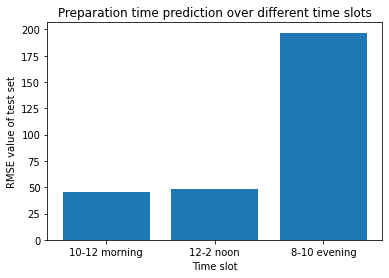

In [114]:
X_axis = list(RMSERestWise.keys())
Y_axis = list(RMSERestWise.values())

plt.bar(X_axis, Y_axis)
plt.xticks(X_axis)
plt.xlabel("Time slot")
plt.ylabel("RMSE value of test set")
plt.title("Preparation time prediction over different time slots")
plt.show()

In [89]:
#activation: relu, logistic
def ModelResults(X_train, X_test, y_train, y_test, model, isNormalizationRequired=True):
    
    if(isNormalizationRequired):
        scaler = StandardScaler()
        scaler.fit(X_train)

        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    if(model=='NN'):
        hidden_layer_sizes=(80, 30, 10)
        activation='relu'
        print("Neural Network model")
        print("Hidden layers: ", hidden_layer_sizes)
        print("Activation function: ", activation)
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=1000, verbose=True, learning_rate='constant', learning_rate_init=0.01)
        mlp.fit(X_train, y_train)
        print(mlp.best_loss_)
        
        predictions = mlp.predict(X_train)
        print("RMSE score on validation set: ", getRMSE(y_train, predictions))
        
        predictions = mlp.predict(X_test)
        print("RMSE score on test set: ", getRMSE(y_test, predictions))
        
    elif(model=='RF'):
        print("Random Forest Model")
        regressor = RandomForestRegressor()
        regressor.fit(X_train, y_train)
        
        predictions = regressor.predict(X_train)
        print("RMSE score on validation set: ", getRMSE(y_train, predictions))
        
        predictions = regressor.predict(X_test)
        print("RMSE score on test set: ", getRMSE(y_test, predictions))
    else:
        print("Model not implemented yet")

In [86]:
mlp.predict_log_proba(X)

array([[ -9.68770891,  -7.18229529,  -7.05802898, ..., -10.05756664,
        -11.47823238,  -9.53518635],
       [ -9.68770891,  -7.18229529,  -7.05802898, ..., -10.05756664,
        -11.47823238,  -9.53518635],
       [ -9.68770891,  -7.18229529,  -7.05802898, ..., -10.05756664,
        -11.47823238,  -9.53518635],
       ...,
       [ -9.68770891,  -7.18229529,  -7.05802898, ..., -10.05756664,
        -11.47823238,  -9.53518635],
       [ -9.68770891,  -7.18229529,  -7.05802898, ..., -10.05756664,
        -11.47823238,  -9.53518635],
       [ -9.68770891,  -7.18229529,  -7.05802898, ..., -10.05756664,
        -11.47823238,  -9.53518635]])

In [ ]:

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_train)

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_train, predictions)  
rmse = math.sqrt(mse)  
rmse

In [93]:
def getRMSE(actual, predictions):
    mse = sklearn.metrics.mean_squared_error(actual, predictions)
    return math.sqrt(mse)